Random Imputation

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import MissingIndicator,SimpleImputer

In [2]:
df = pd.read_csv('/content/tatinic-train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [9]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
X= df.drop(columns=['Survived'])
y = df['Survived']

In [11]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=2)

In [12]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [13]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [14]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN


In [15]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [18]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([36.  , 19.  , 30.  , 48.  ,  7.  , 50.  , 22.  , 50.  , 45.5 ,
       25.  ,  0.83, 37.  , 15.  , 17.  , 24.  , 50.  ,  4.  , 20.  ,
       30.  , 25.  , 18.  , 28.  , 17.  ,  4.  , 42.  , 40.  , 29.  ,
       22.  , 11.  , 38.  , 21.  , 25.  , 58.  , 20.  , 32.  , 21.  ,
       24.  , 34.  , 20.  , 33.  , 33.  , 31.  ,  9.  , 47.  , 19.  ,
       22.  , 40.  , 36.  , 22.  , 18.  , 50.  , 28.  , 23.  , 26.  ,
       28.5 , 17.  , 32.  , 28.  , 23.  , 29.  , 41.  ,  1.  , 23.  ,
       58.  , 23.  , 24.  , 40.  , 30.  , 20.  ,  6.  , 16.  ,  6.  ,
       32.  , 50.  , 65.  , 18.  , 36.  , 66.  , 22.  , 21.  , 47.  ,
       35.  , 52.  ,  9.  , 16.  , 18.  , 41.  , 29.  , 34.  , 17.  ,
        2.  , 19.  , 36.  , 48.  , 20.  , 17.  , 36.  , 22.  , 43.  ,
       30.  , 16.  , 17.  , 33.  , 18.  , 36.  , 25.  , 52.  , 25.  ,
       30.  , 39.  , 16.  , 45.  , 27.  , 36.  , 18.  , 36.5 , 31.  ,
       26.  , 36.  , 45.  , 37.  , 18.  , 14.  , 27.  , 35.  ,  3.  ,
       47.  , 42.  ,

In [19]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]=X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()]=X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [20]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,23.0
493,71.0,49.5042,71.0
527,NaN,221.7792,20.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


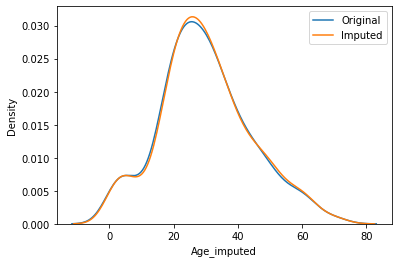

In [21]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [22]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  204.8746493210625


In [23]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,48.387843
Age,71.512440,204.349513,204.349513
Age_imputed,48.387843,204.349513,204.874649


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


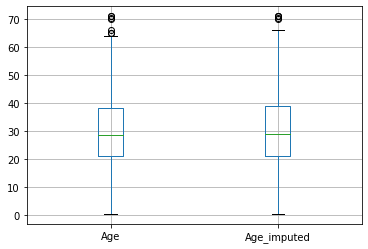

In [24]:
X_train[['Age','Age_imputed']].boxplot()

For the same fare value this generate a same random number i.e if 1st time for fare 40 random value is generated 50 then second time for same fare random will still 50

In [26]:
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(X_train['Fare']))

TypeError: ignored

In [31]:
data = pd.read_csv('/content/house-train.csv', usecols = ['GarageQual','FireplaceQu','SalePrice'])

In [32]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [33]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [34]:
X = data
y = data['SalePrice']

In [35]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=2)

In [36]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [37]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1003,NaN,TA,136905,TA,NaN
740,NaN,TA,132000,TA,NaN
681,NaN,TA,159434,TA,NaN
510,TA,TA,164900,TA,TA
715,TA,TA,165000,TA,TA


In [38]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()]=X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()]=X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()]=X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()]=X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3

In [39]:
temp = pd.concat([
                  X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
                  X_train['GarageQual_imputed'].value_counts() / len(X_train['GarageQual_imputed'].dropna())
],axis=1)

temp.columns = ['original','imputed']

temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [40]:
temp = pd.concat([
                  X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
                  X_train['FireplaceQu_imputed'].value_counts() / len(X_train['FireplaceQu_imputed'].dropna())
],axis=1)

temp.columns = ['original','imputed']

temp

,original,imputed
Gd,0.494272,0.488870
TA,0.412439,0.416952
Fa,0.040917,0.041952
Po,0.027823,0.028253
Ex,0.024550,0.023973


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

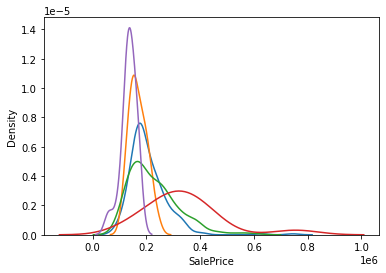

In [41]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

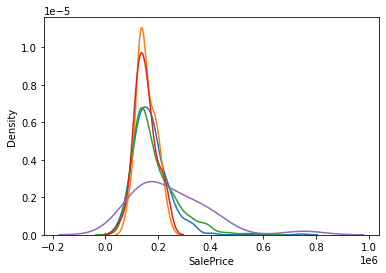

In [42]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

#Missing Indictor

In [43]:
df = pd.read_csv('/content/tatinic-train.csv',usecols = ['Age','Fare','Survived'])

In [44]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [45]:
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.2,random_state=2)

In [46]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [48]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [49]:
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [50]:
from sklearn.linear_model import LogisticRegression 

clf = LogisticRegression ()
clf.fit(X_train_trf,y_train)
y_pred=clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score 

accuracy_score (y_test,y_pred)

0.6145251396648045

In [51]:
mi = MissingIndicator()
mi.fit(X_train)

MissingIndicator()

In [52]:
mi.features_

array([0])

In [53]:
X_train_missing = mi.transform(X_train)

In [54]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [55]:
X_test_missing = mi.transform(X_test)

In [56]:
X_test_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [57]:
X_train['Age_NA'] = X_train_missing

In [58]:
X_test['Age_NA'] = X_test_missing

In [59]:
X_test

,Age,Fare,Age_NA
707,42.0,26.2875,False
37,21.0,8.0500,False
615,24.0,65.0000,False
169,28.0,56.4958,False
68,17.0,7.9250,False
...,...,...,...
89,24.0,8.0500,False
80,22.0,9.0000,False
846,NaN,69.5500,True
870,26.0,7.8958,False


In [60]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [61]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173

In [62]:
si = SimpleImputer(add_indicator=True)

In [63]:
X_train = si.fit_transform(X_train)

In [64]:
X_test = si.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6312849162011173